C:\Users\afedy\AppData\Local\Temp\ipykernel_3768\41235304.py:7: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv("1.csv")


             id        date  confirmed    deaths  recovered  tests  vaccines  \
96112  5f04e56c  2020-01-03        NaN       NaN        NaN    NaN       NaN   
96113  5f04e56c  2020-01-04        NaN       NaN        NaN    NaN       NaN   
96114  5f04e56c  2020-01-05        NaN       NaN        NaN    NaN       NaN   
96115  5f04e56c  2020-01-06        NaN       NaN        NaN    NaN       NaN   
96116  5f04e56c  2020-01-07        NaN       NaN        NaN    NaN       NaN   
...         ...         ...        ...       ...        ...    ...       ...   
97269  5f04e56c  2023-03-05  5701743.0  119213.0        NaN    NaN       NaN   
97270  5f04e56c  2023-03-06  5701855.0  119216.0        NaN    NaN       NaN   
97271  5f04e56c  2023-03-07  5701959.0  119217.0        NaN    NaN       NaN   
97272  5f04e56c  2023-03-08  5711818.0  119281.0        NaN    NaN       NaN   
97273  5f04e56c  2023-03-09  5711929.0  119283.0        NaN    NaN       NaN   

       people_vaccinated  people_fully_

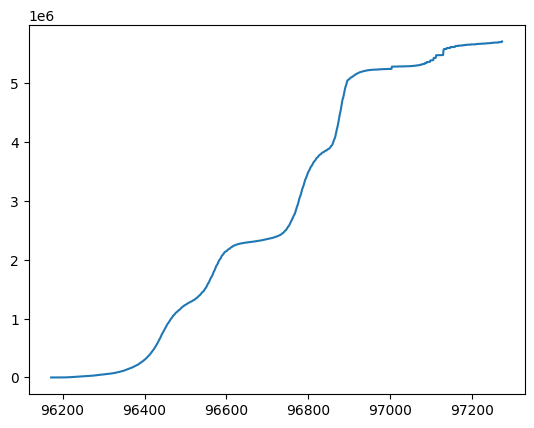

In [210]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("covid_19_clean_complete.csv")
df
df1 = pd.read_csv("1.csv")

ukraine_data = df1[df1['key_apple_mobility'] == 'Ukraine']
data = ukraine_data[ukraine_data['confirmed'] != '']
print(data)

plt.plot(data.index, data['confirmed'])

In [211]:
data = data[['date', 'confirmed']]
data

,date,confirmed
96112,2020-01-03,NaN
96113,2020-01-04,NaN
96114,2020-01-05,NaN
96115,2020-01-06,NaN
96116,2020-01-07,NaN
...,...,...
97269,2023-03-05,5701743.0
97270,2023-03-06,5701855.0
97271,2023-03-07,5701959.0
97272,2023-03-08,5711818.0


In [212]:
import datetime 

def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)

data['date'] = data['date'].apply(str_to_datetime)


In [213]:
data.index = data.pop('date')
data

,confirmed
date,
2020-01-03,NaN
2020-01-04,NaN
2020-01-05,NaN
2020-01-06,NaN
2020-01-07,NaN
...,...
2023-03-05,5701743.0
2023-03-06,5701855.0
2023-03-07,5701959.0


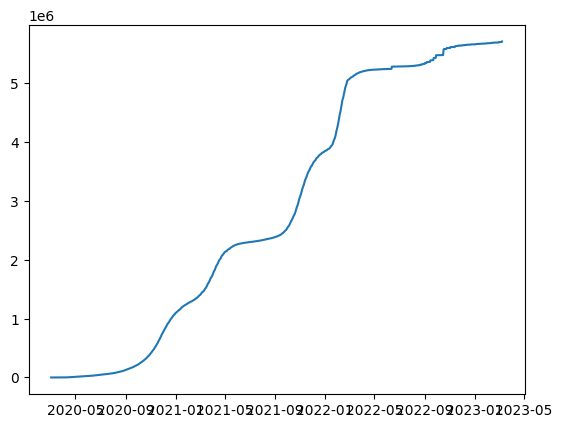

In [214]:

plt.plot(data.index, data['confirmed'])

In [215]:
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
    first_date = str_to_datetime(first_date_str)
    last_date  = str_to_datetime(last_date_str)

    target_date = first_date
    
    dates = []
    X, Y = [], []

    last_time = False
    while True:
        df_subset = dataframe.loc[:target_date].tail(n+1)
        
        if len(df_subset) != n+1:
            print(f'Error: Window of size {n} is too large for date {target_date}')
            return

        values = df_subset['confirmed'].to_numpy()
        x, y = values[:-1], values[-1]

        dates.append(target_date)
        X.append(x)
        Y.append(y)

        next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
        next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
        next_date_str = next_datetime_str.split('T')[0]
        year_month_day = next_date_str.split('-')
        year, month, day = year_month_day
        next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
        
        if last_time:
            break
        
        target_date = next_date

        if target_date == last_date:
            last_time = True
        
    ret_df = pd.DataFrame({})
    ret_df['Target Date'] = dates
    
    X = np.array(X)
    for i in range(0, n):
        X[:, i]
        ret_df[f'Target-{n-i}'] = X[:, i]
    
    ret_df['Target'] = Y

    return ret_df


windowed_df = df_to_windowed_df(data, 
                                '2020-03-08', 
                                '2023-03-09', 
                                n=5)
windowed_df

,Target Date,Target-5,Target-4,Target-3,Target-2,Target-1,Target
0,2020-03-08,1.0,1.0,1.0,1.0,1.0,1.0
1,2020-03-09,1.0,1.0,1.0,1.0,1.0,1.0
2,2020-03-10,1.0,1.0,1.0,1.0,1.0,1.0
3,2020-03-11,1.0,1.0,1.0,1.0,1.0,1.0
4,2020-03-12,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...
1092,2023-03-05,5693846.0,5701249.0,5701333.0,5701474.0,5701602.0,5701743.0
1093,2023-03-06,5701249.0,5701333.0,5701474.0,5701602.0,5701743.0,5701855.0
1094,2023-03-07,5701333.0,5701474.0,5701602.0,5701743.0,5701855.0,5701959.0
1095,2023-03-08,5701474.0,5701602.0,5701743.0,5701855.0,5701959.0,5711818.0


In [216]:
def windowed_df_to_date_X_y(windowed_dataframe):
    df_as_np = windowed_dataframe.to_numpy()

    dates = df_as_np[:, 0]

    middle_matrix = df_as_np[:, 1:-1]
    X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

    Y = df_as_np[:, -1]

    return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((1097,), (1097, 5, 1), (1097,))

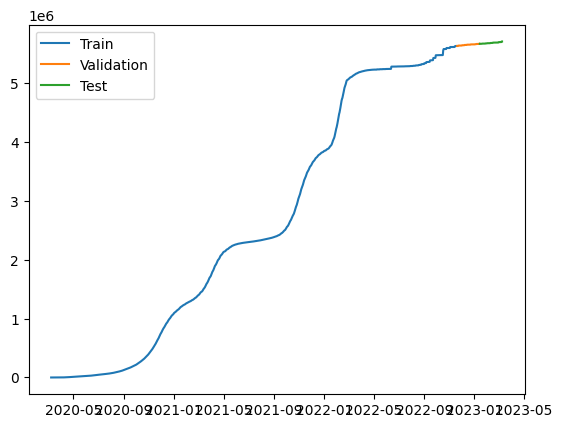

In [222]:
q_90 = int(len(dates) * .9)
q_95 = int(len(dates) * .95)

dates_train, X_train, y_train = dates[:q_90], X[:q_90], y[:q_90]

dates_val, X_val, y_val = dates[q_90:q_95], X[q_90:q_95], y[q_90:q_95]
dates_test, X_test, y_test = dates[q_95:], X[q_95:], y[q_95:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [236]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler


X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_val_reshaped = X_val.reshape(X_val.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

# Apply MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_reshaped)
X_val_scaled = scaler.transform(X_val_reshaped)
X_test_scaled = scaler.transform(X_test_reshaped)

y_train_reshaped = y_train.reshape(-1, 1)
y_val_reshaped = y_val.reshape(-1, 1)
y_test_reshaped = y_test.reshape(-1, 1)

scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train_reshaped)
y_val_scaled = scaler_y.transform(y_val_reshaped)
y_test_scaled = scaler_y.transform(y_test_reshaped)

model = Sequential([layers.Input((5, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.00001)),
                    layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.00001)),
                    layers.Dropout(0.2),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.0001),
              metrics=['mean_absolute_error'])

early_stopping = EarlyStopping(monitor='val_loss', patience=290, restore_best_weights=True)
model.fit(X_train_scaled, y_train_scaled, validation_data=(X_val_scaled, y_val_scaled), epochs=10000, callbacks=[early_stopping])

Epoch 1/10000
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.3028 - mean_absolute_error: 0.4329 - val_loss: 0.7672 - val_mean_absolute_error: 0.8753
Epoch 2/10000
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2420 - mean_absolute_error: 0.3814 - val_loss: 0.5748 - val_mean_absolute_error: 0.7575
Epoch 3/10000
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1657 - mean_absolute_error: 0.3167 - val_loss: 0.3915 - val_mean_absolute_error: 0.6249
Epoch 4/10000
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1163 - mean_absolute_error: 0.2623 - val_loss: 0.2197 - val_mean_absolute_error: 0.4678
Epoch 5/10000
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0588 - mean_absolute_error: 0.1903 - val_loss: 0.0924 - val_mean_absolute_error: 0.3027
Epoch 6/10000
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0338 - mean_absolute_error: 0.1447 - val_loss: 0.0289 - val_mean_absolute_error: 0.1680
Epoch 7/10000
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0238 - mean_absolute_error: 0.

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Mean Absolute Error: 0.007376599
Mean Squared Error: 7.756636e-05
Root Mean Squared Error: 0.008807177


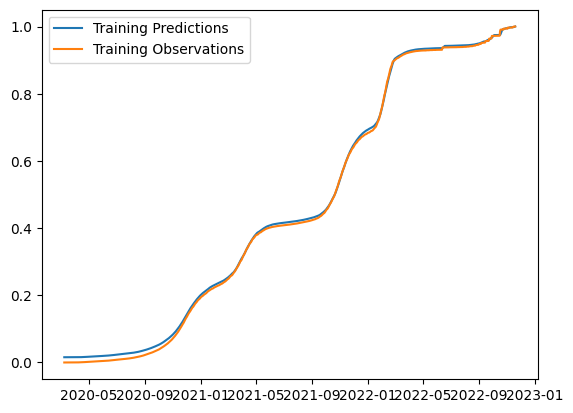

In [246]:
train_predictions = model.predict(X_train_scaled).flatten()

from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_train_scaled, train_predictions)
mse = mean_squared_error(y_train_scaled, train_predictions)
rmse = np.sqrt(mse)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train_scaled)
plt.legend(['Training Predictions', 'Training Observations'])

Mean Absolute Error (Unscaled): 41569.594
Mean Squared Error (Unscaled): 2463273200.0
Root Mean Squared Error (Unscaled): 49631.375
R-squared: 0.9994066435556743


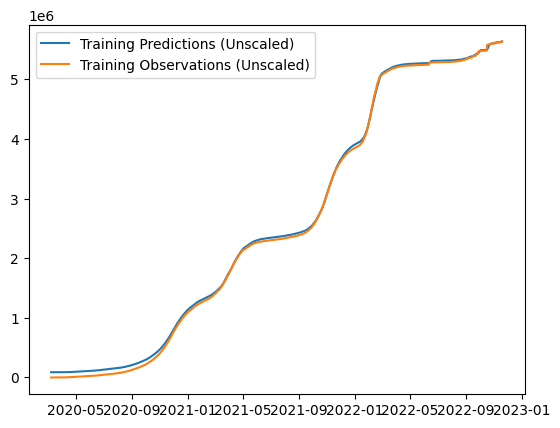

In [249]:
train_predictions_unscaled = scaler_y.inverse_transform(train_predictions.reshape(-1, 1))
y_train_original = scaler_y.inverse_transform(y_train_scaled)
# Calculate evaluation metrics using unscaled data
mae_unscaled = mean_absolute_error(y_train_original, train_predictions_unscaled)
mse_unscaled = mean_squared_error(y_train_original, train_predictions_unscaled)
rmse_unscaled = np.sqrt(mse_unscaled)

print("Mean Absolute Error (Unscaled):", mae_unscaled)
print("Mean Squared Error (Unscaled):", mse_unscaled)
print("Root Mean Squared Error (Unscaled):", rmse_unscaled)

plt.plot(dates_train, train_predictions_unscaled)
plt.plot(dates_train, y_train_original)
plt.legend(['Training Predictions (Unscaled)', 'Training Observations (Unscaled)'])

from sklearn.metrics import r2_score

# Calculate R-squared
r_squared = r2_score(y_train_original, train_predictions_unscaled)

print("R-squared:", r_squared)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
R-squared: 0.9622695377187684


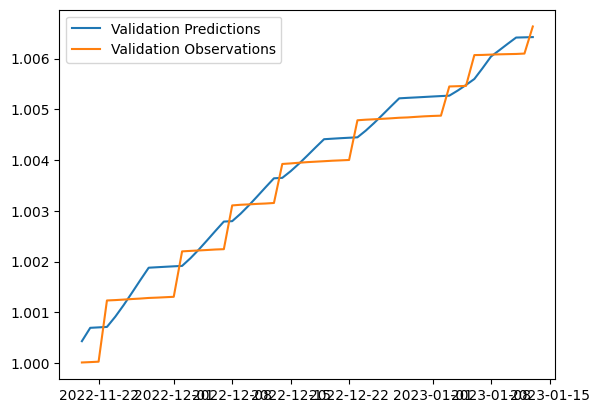

In [250]:
val_predictions = model.predict(X_val_scaled).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val_scaled)
plt.legend(['Validation Predictions', 'Validation Observations'])

r_squared = r2_score(y_val_scaled, val_predictions)

print("R-squared:", r_squared)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
R-squared: 0.9319380383992074


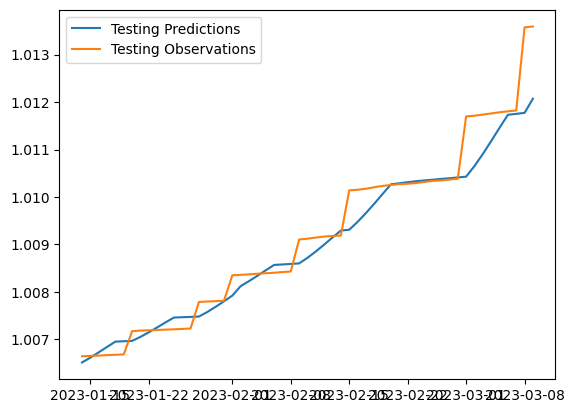

In [251]:
test_predictions = model.predict(X_test_scaled).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test_scaled)
plt.legend(['Testing Predictions', 'Testing Observations'])


r_squared = r2_score(y_test_scaled, test_predictions)

print("R-squared:", r_squared)
